In [1]:
!nvidia-smi

Thu Dec 12 14:58:43 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   46C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [1]:
!pip install Pillow==9.5.0

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [3]:
!git clone https://github.com/SkalskiP/yolov9.git
%cd yolov9
!pip install -r requirements.txt -q

Cloning into 'yolov9'...
remote: Enumerating objects: 325, done.
remote: Total 325 (delta 0), reused 0 (delta 0), pack-reused 325 (from 1)
Receiving objects: 100% (325/325), 2.25 MiB | 5.35 MiB/s, done.
Resolving deltas: 100% (162/162), done.
/content/yolov9
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 36.1 MB/s eta 0:00:00


In [4]:
!pip install -q roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.9/80.9 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 7.5 MB/s eta 0:00:00


In [5]:
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/yolov9-c.pt
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/yolov9-e.pt
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/gelan-c.pt
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/gelan-e.pt

In [6]:
!ls -la {HOME}/weights

total 402444
drwxr-xr-x 2 root root      4096 Dec 12 14:59 .
drwxr-xr-x 1 root root      4096 Dec 12 14:59 ..
-rw-r--r-- 1 root root  51508261 Feb 18  2024 gelan-c.pt
-rw-r--r-- 1 root root 117203713 Feb 18  2024 gelan-e.pt
-rw-r--r-- 1 root root 103153312 Feb 18  2024 yolov9-c.pt
-rw-r--r-- 1 root root 140217688 Feb 18  2024 yolov9-e.pt


In [7]:
%cd {HOME}/yolov9

/content/yolov9


In [8]:
# !pip install roboflow

# from roboflow import Roboflow
# rf = Roboflow(api_key="Q0uwqIfggKbtoFOEnlUz")
# project = rf.workspace("lets-goooo").project("proj-f1dq8-zmhhp")
# version = project.version(3)
# dataset = version.download("yolov9")

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="Q0uwqIfggKbtoFOEnlUz")
project = rf.workspace("lets-goooo").project("proj-f1dq8-zmhhp")
version = project.version(4)
dataset = version.download("yolov9")



loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to proj-4 in yolov9:: 100%|██████████| 4212/4212 [00:00<00:00, 5358.34it/s]


In [9]:
# !pip install ultralytics
# from ultralytics import YOLO

# # Build a YOLOv9c model from pretrained weights and train
# model = YOLO("yolov9c.pt")
# results = model.train(data="/content/yolov9/proj-4/data.yaml", epochs=10, imgsz=640)

# %cd {HOME}/yolov9

# !python train.py \
# --batch 32 --epochs 10 --img 640 --device 0 --min-items 0 --close-mosaic 15 \
# --data {dataset.location}/data.yaml \
# --weights {HOME}/weights/gelan-c.pt \
# --cfg models/detect/gelan-c.yaml \
# --hyp hyp.scratch-high.yaml

%cd {HOME}/yolov9

!python train.py \
--batch 16 --epochs 10 --img 640 --device 0 --min-items 0 --close-mosaic 15 \
--data {dataset.location}/data.yaml \
--weights {HOME}/weights/gelan-c.pt \
--cfg models/detect/gelan-c.yaml \
--hyp hyp.scratch-high.yaml

/content/yolov9
2024-12-12 15:00:51.701239: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-12-12 15:00:51.734395: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-12-12 15:00:51.745350: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-12 15:00:51.769936: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-12-12 15:00:53.442331: W

In [10]:
!ls {HOME}/yolov9/runs/train/exp/

confusion_matrix.png				    PR_curve.png	   val_batch0_pred.jpg
events.out.tfevents.1734015673.60167ded0a00.1658.0  R_curve.png		   val_batch1_labels.jpg
F1_curve.png					    results.csv		   val_batch1_pred.jpg
hyp.yaml					    results.png		   val_batch2_labels.jpg
labels_correlogram.jpg				    train_batch0.jpg	   val_batch2_pred.jpg
labels.jpg					    train_batch1.jpg	   weights
opt.yaml					    train_batch2.jpg
P_curve.png					    val_batch0_labels.jpg


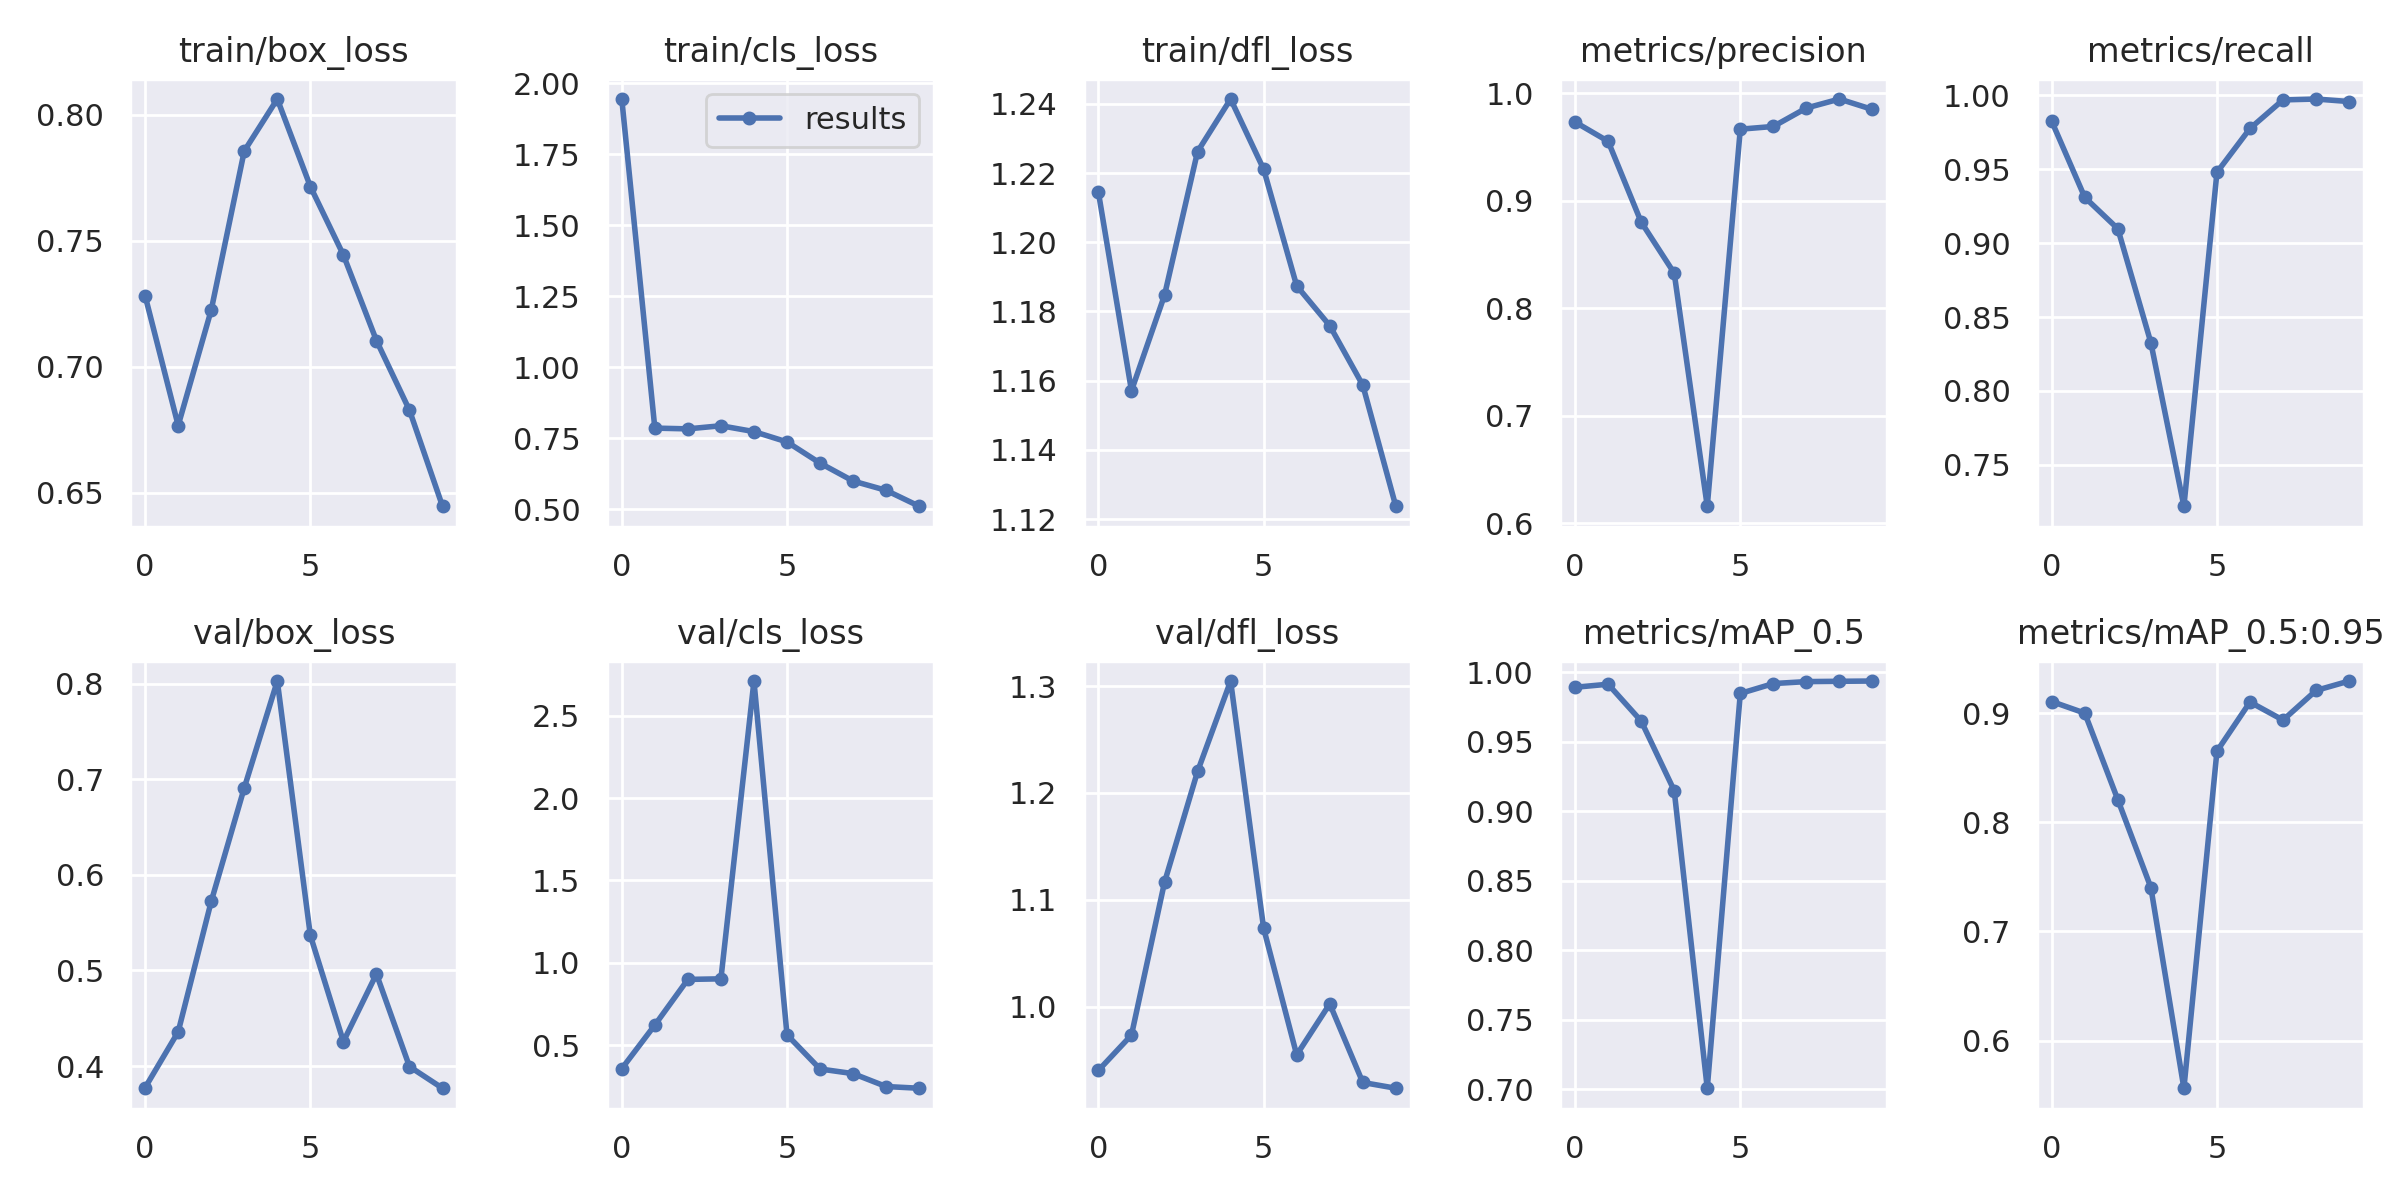

In [11]:
from IPython.display import Image

Image(filename=f"{HOME}/yolov9/runs/train/exp/results.png", width=1000)

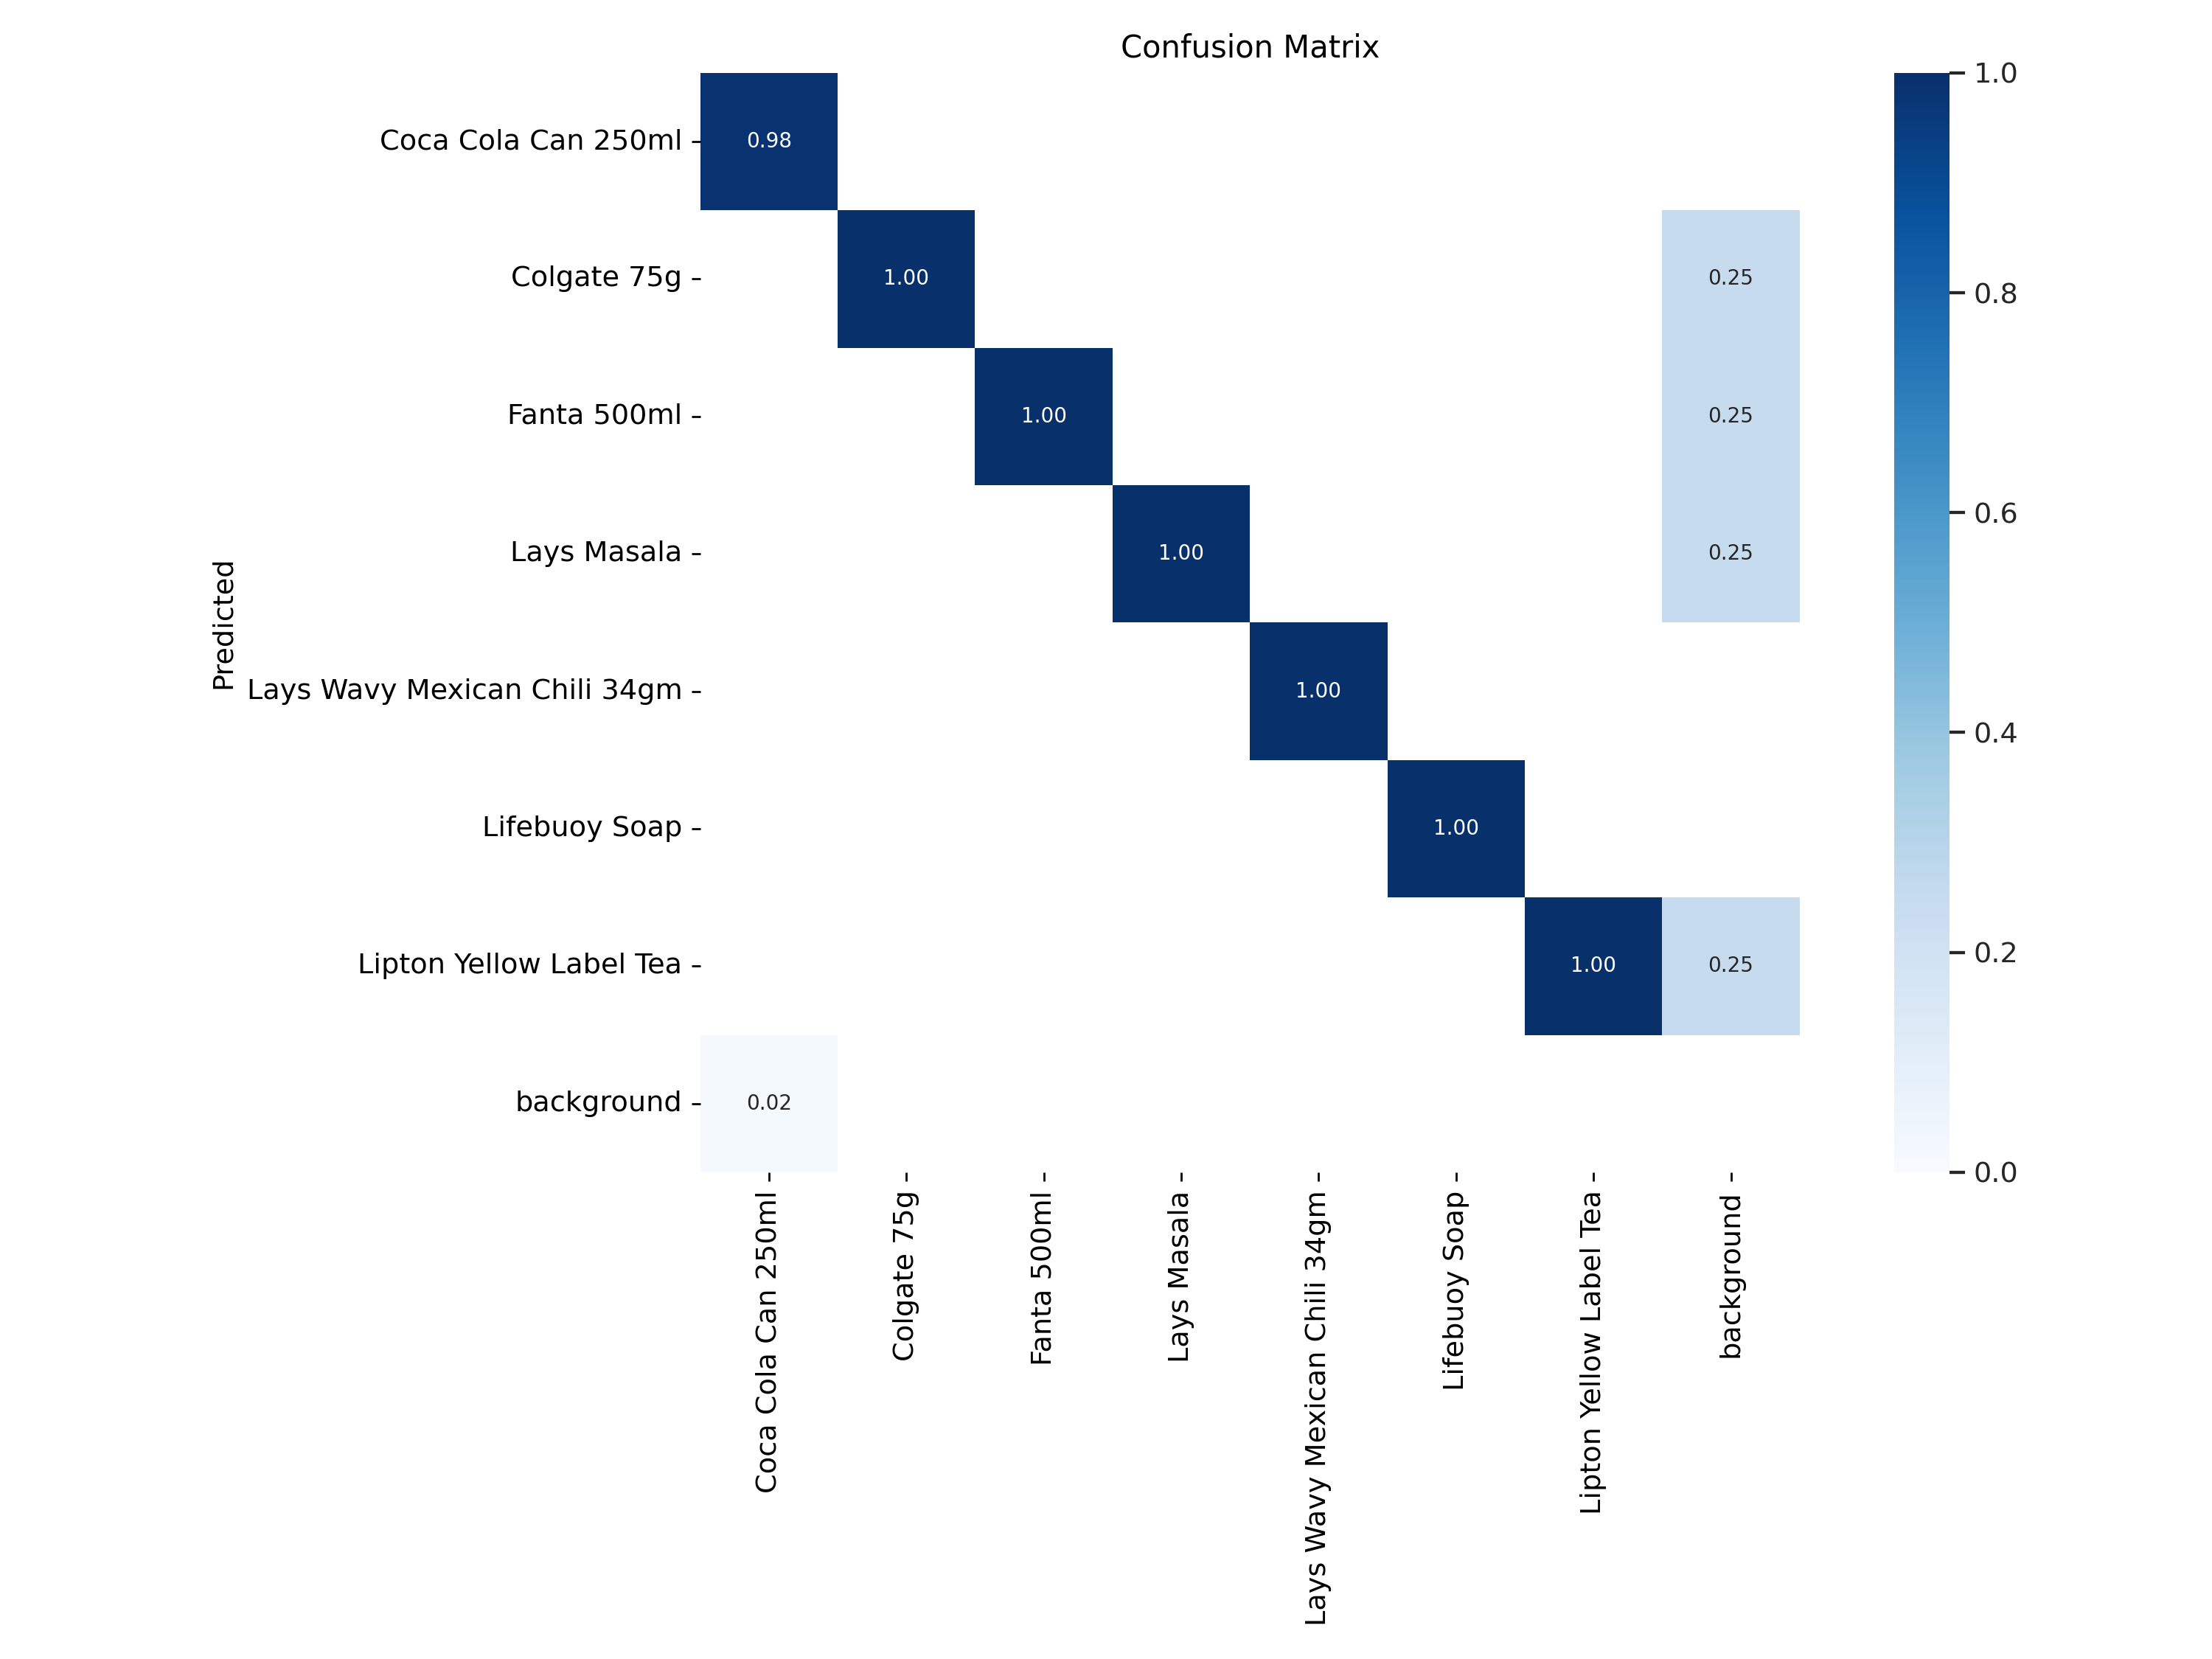

In [12]:
# from IPython.display import Image

# Image(filename=f"/content/yolov9/runs/detect/train/confusion_matrix.png", width=1000)

from IPython.display import Image

Image(filename=f"{HOME}/yolov9/runs/train/exp/confusion_matrix.png", width=1000)

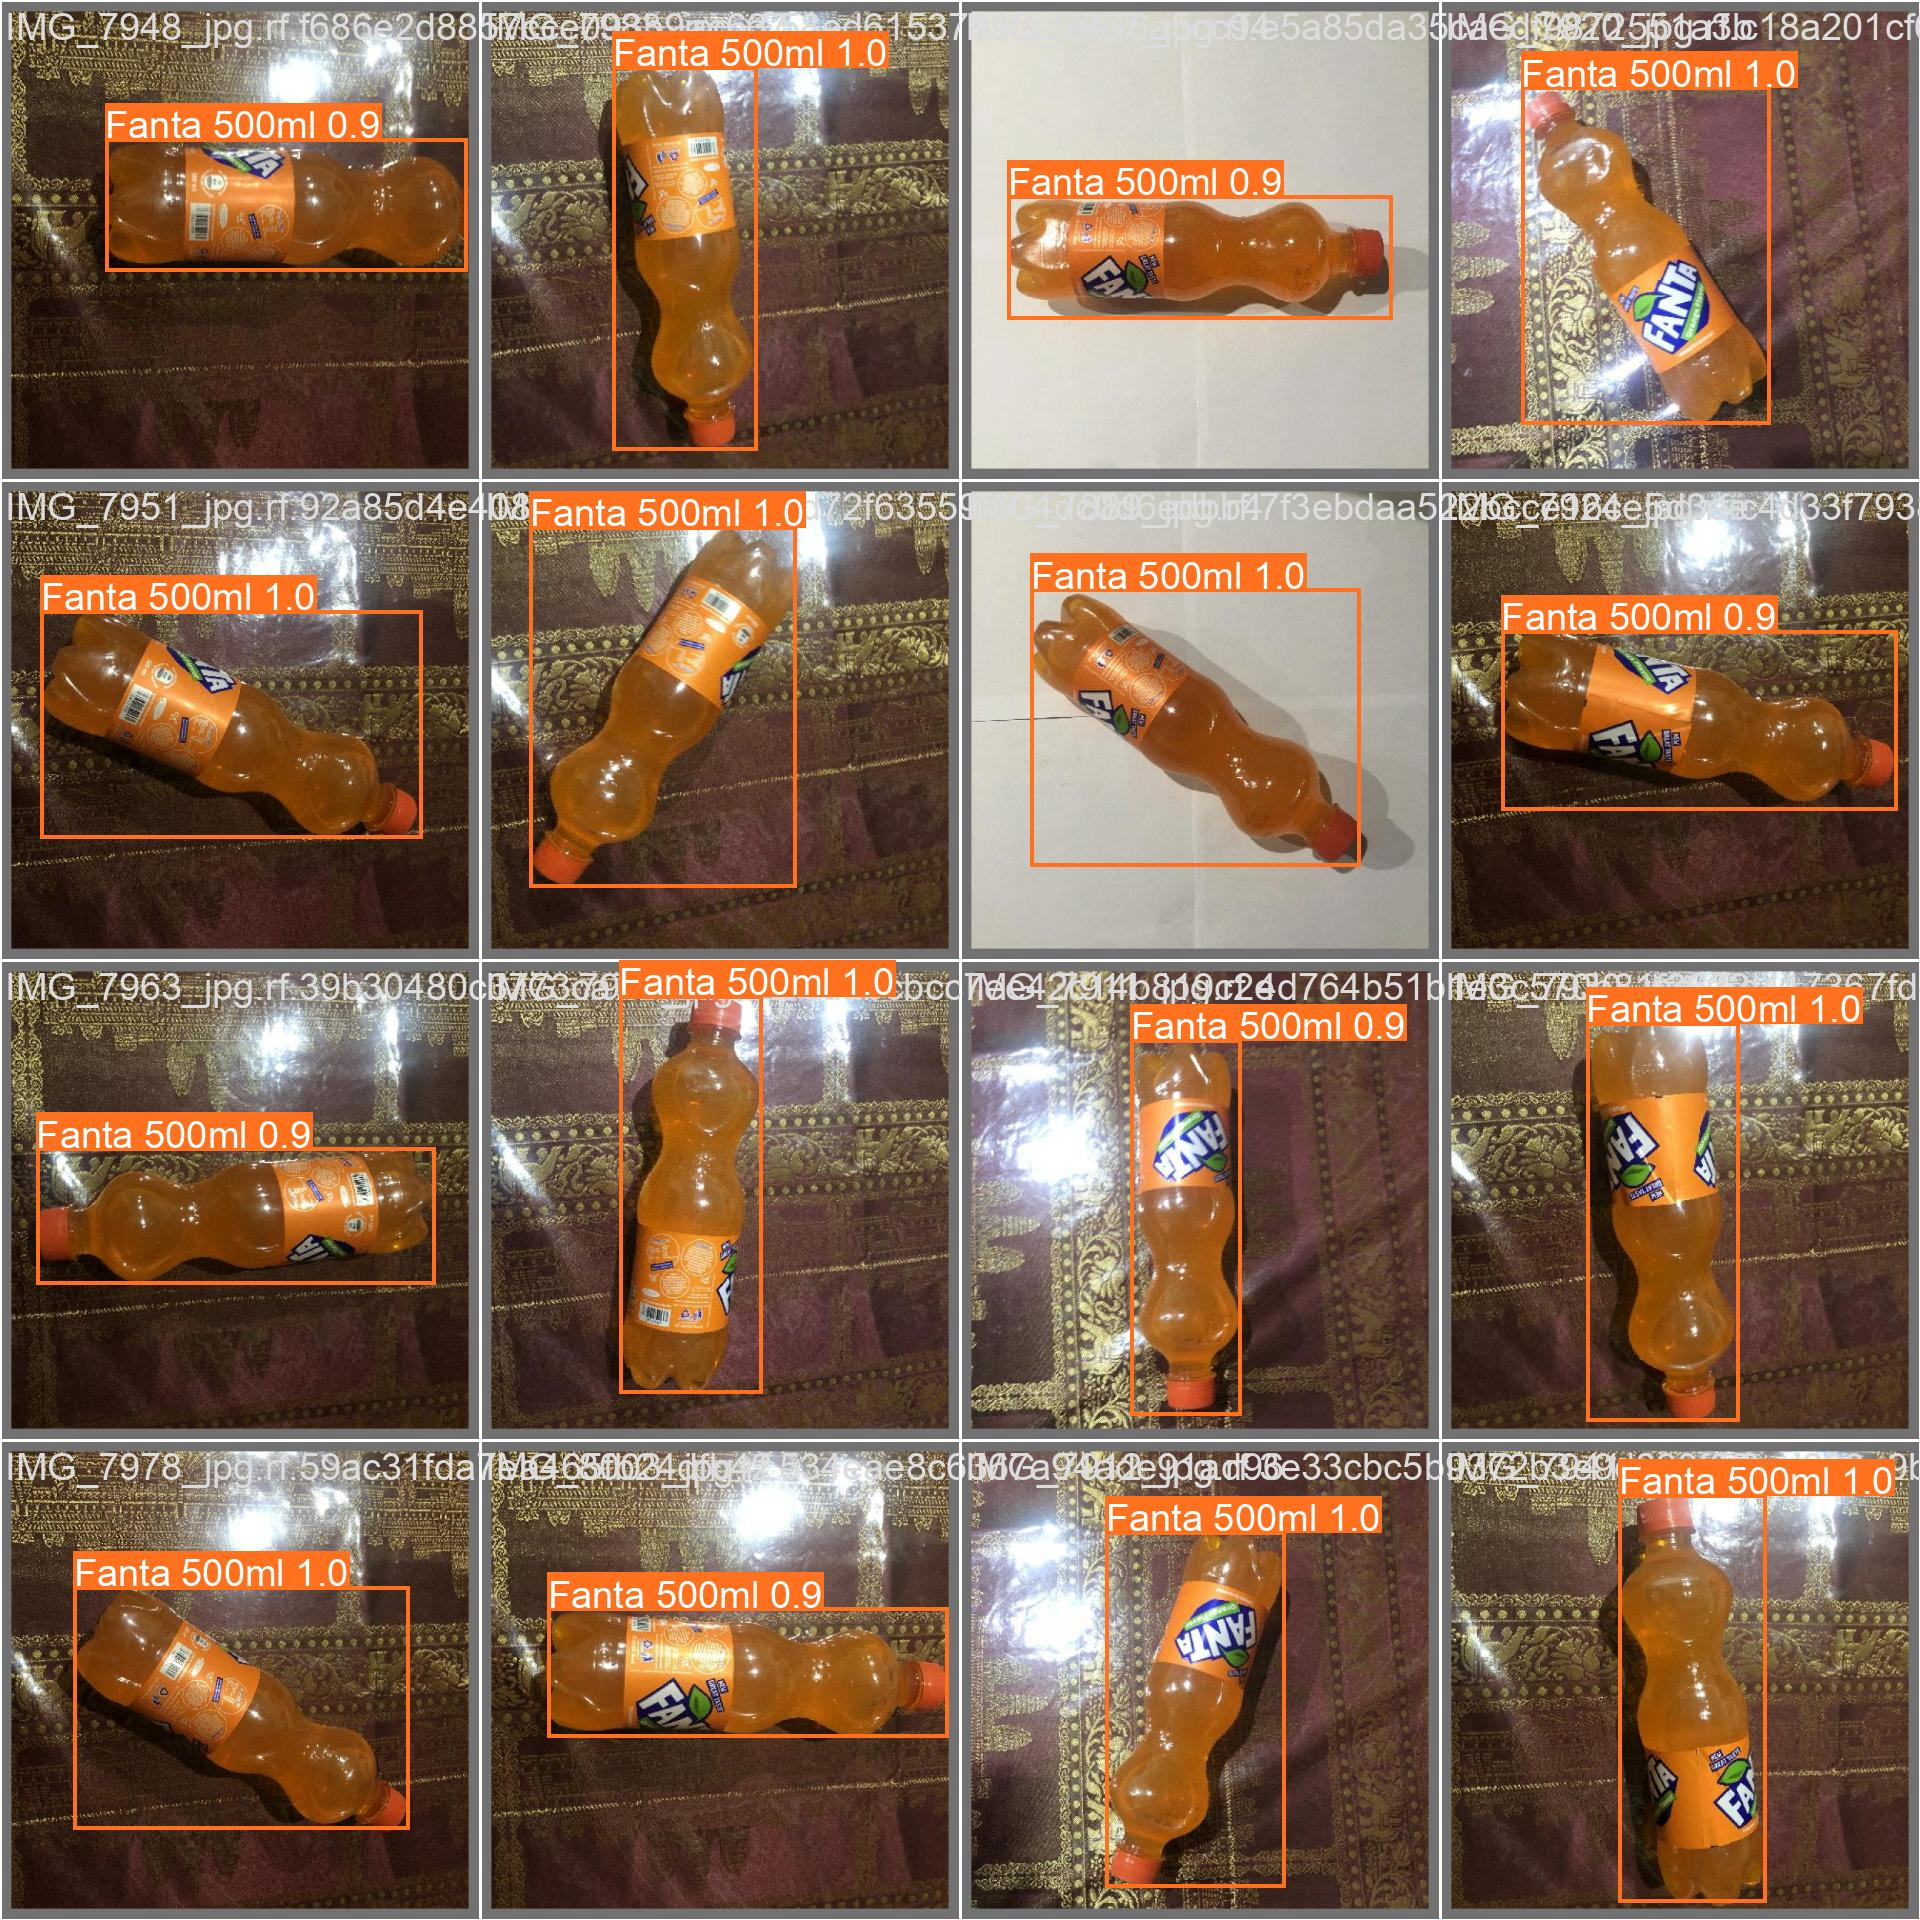

In [13]:
# from IPython.display import Image

# Image(filename=f"/content/yolov9/runs/detect/train/val_batch0_pred.jpg", width=1000)
from IPython.display import Image

Image(filename=f"{HOME}/yolov9/runs/train/exp/val_batch0_pred.jpg", width=1000)

In [14]:
%cd {HOME}/yolov9

!python val.py \
--img 640 --batch 32 --conf 0.001 --iou 0.7 --device 0 \
--data {dataset.location}/data.yaml \
--weights {HOME}/yolov9/runs/train/exp/weights/best.pt

/content/yolov9
val: data=/content/yolov9/proj-4/data.yaml, weights=['/content/yolov9/runs/train/exp/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.7, max_det=300, task=val, device=0, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False, min_items=0
YOLOv5 🚀 1e33dbb Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

/content/yolov9/models/experimental.py:75: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions th

In [15]:
# import locale
# def getpreferredencoding(do_setlocale = True):
#     return "UTF-8"
# locale.getpreferredencoding = getpreferredencoding

In [16]:
# %cd {HOME}/yolov9

# !python val.py \
# --img 640 --batch 16 --conf 0.001 --iou 0.7 --device 0 \
# --data /content/yolov9/proj-4/data.yaml \
# --weights /content/yolov9/runs/detect/train/weights/best.pt

In [17]:
# !python detect.py \
# --img 1280 --conf 0.1 --device 0 \
# --weights /content/yolov9/runs/detect/train/weights/best.pt \
# --source /content/yolov9/proj-4/test/images

!python detect.py \
--img 1280 --conf 0.1 --device 0 \
--weights {HOME}/yolov9/runs/train/exp/weights/best.pt \
--source {dataset.location}/test/images

detect: weights=['/content/yolov9/runs/train/exp/weights/best.pt'], source=/content/yolov9/proj-4/test/images, data=data/coco128.yaml, imgsz=[1280, 1280], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=0, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 1e33dbb Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

/content/yolov9/models/experimental.py:75: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the

In [19]:
import glob

from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/yolov9/runs/detect/exp3/*.jpg')[:2]:
      display(Image(filename=image_path, width=600))

In [20]:
!pip install -q inference supervision

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.7/105.7 kB 8.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 881.0/881.0 kB 27.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.7/135.7 kB 14.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 59.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 81.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 891.9/891.9 kB 61.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.0/64.0 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 774.7/774.7 kB 54.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.2/139.2 kB 14.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 13.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 9.6 MB/s

In [21]:
import cv2
import random
import getpass

import supervision as sv
!pip install inference

from inference import get_model

%matplotlib inline

In [22]:
# version.deploy(model_type="yolov9", model_path=f"/content/yolov9/runs/detect/train")
# version.deploy(model_type="yolov9", model_path=f"{HOME}/yolov9/runs/train/exp")
version.deploy(model_type="yolov9", model_path=f"{HOME}/yolov9/runs/train/exp")

View the status of your deployment at: https://app.roboflow.com/lets-goooo/proj-f1dq8-zmhhp/4
Share your model with the world at: https://universe.roboflow.com/lets-goooo/proj-f1dq8-zmhhp/model/4


In [23]:
# prompt: download run folder

from google.colab import files
import os

# Define the folder you want to download
folder_to_download = "/content/yolov9/runs"  # Replace with the actual path

# Create a zip file of the folder
!zip -r /content/yolov9/runs.zip /content/yolov9/runs

# Download the zip file
files.download("/content/yolov9/runs.zip")

  adding: content/yolov9/runs/ (stored 0%)
  adding: content/yolov9/runs/train/ (stored 0%)
  adding: content/yolov9/runs/train/exp/ (stored 0%)
  adding: content/yolov9/runs/train/exp/confusion_matrix.png (deflated 22%)
  adding: content/yolov9/runs/train/exp/val_batch0_pred.jpg (deflated 6%)
  adding: content/yolov9/runs/train/exp/val_batch1_labels.jpg (deflated 5%)
  adding: content/yolov9/runs/train/exp/val_batch2_labels.jpg (deflated 7%)
  adding: content/yolov9/runs/train/exp/model_artifacts.json (deflated 66%)
  adding: content/yolov9/runs/train/exp/train_batch2.jpg (deflated 3%)
  adding: content/yolov9/runs/train/exp/train_batch1.jpg (deflated 5%)
  adding: content/yolov9/runs/train/exp/labels.jpg (deflated 28%)
  adding: content/yolov9/runs/train/exp/weights/ (stored 0%)
  adding: content/yolov9/runs/train/exp/weights/best.pt (deflated 7%)
  adding: content/yolov9/runs/train/exp/weights/best_striped.pt (deflated 8%)
  adding: content/yolov9/runs/train/exp/weights/last.pt (def

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="Q0uwqIfggKbtoFOEnlUz")
project = rf.workspace("lets-goooo").project("proj-f1dq8-zmhhp")
version = project.version(3)


loading Roboflow workspace...
loading Roboflow project...
